# Chapter 4 - Vector applications

Course repo: https://github.com/mikexcohen/LinAlg4DataScience/tree/main

In [119]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

np.set_printoptions(suppress=True, precision=4)

## Correlations and cosine similarity

- A correlation coefficient is a single number that quantifies
 the linear relationship between two variables.

- Range from -1 to +1

## K-Means


1. Initialize k centroids as random points in the data space. Each centroid is a class,
or category, and the next steps will assign each data observation to each class. (A
centroid is a center generalized to any number of dimensions.)

2. Compute the Euclidean distance between each data observation and eachcentroid.1

3. Assign each data observation to the group with the closest centroid.

4. Update each centroid as the average of all data observations assigned to that centroid.
5. Repeat steps 2–4 until a convergence criteria is satisfied, or for N iterations.

In [120]:
from sklearn.datasets import make_blobs

## Step 0: Create data

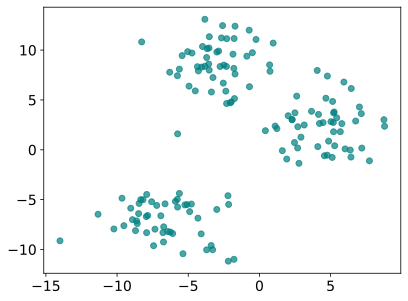

In [121]:
# Create Data
data = np.random.uniform(1, 10, (150, 2))

data, true_labels = make_blobs(n_samples=150, centers=3, cluster_std=2.2, random_state=42)


plt.scatter(data[:, 0], data[:, 1], alpha=0.7, color='teal')
plt.show()

## Step 1: Initialize k random centroids in the data

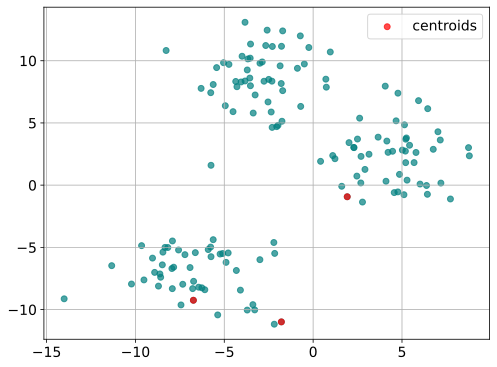

In [122]:
# Step 1: Initialize k random centroids 

# Let's fix it to k = 3
k = 3

# Select k random values between 0 and 150 (lenght of our data) This will produce for example array([10, 52, 86])
rng = np.random.default_rng(seed=0)
ridx = rng.choice(len(data), k, replace=False)

# Select rows from our random choice
centroids = data[ridx]

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.7, color='teal')
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.7, color=('red'), label='centroids')

plt.legend(loc='best')
plt.grid(True)

In [123]:
##################### Recall broadcasting in python #####################
# When vectors are not the same size Python performs a broadcasting operation 
# v is 3x1 
# w is 1x2 
# when we add them python broadcasts by adding each value in v to w 3 times and producing 
# The equivalent of 
#  [1 1] + [10 20]
#  [2 2] + [10 20]
#  [3 3] + [10 20]

v = np.array([[1,2,3]]).T # col vector
print('Column vector v: ')
print(v)
w = np.array([[10,20]])   # row vector
print('Row vector w: ')
print(w)
print('v + w')
print(v + w) # addition with broadcasting



##################### Recall broadcasting in python #####################

Column vector v: 
[[1]
 [2]
 [3]]
Row vector w: 
[[10 20]]
v + w
[[11 21]
 [12 22]
 [13 23]]


### Broadcasting the diff of 1 data point to all centroids 

In [124]:
# Let's apply the same here in k-means 
# Let's take our first data point 
d_0 = data[0] 
print('Data point 0:')
print(d_0)

# We want to substract the 3 centroids 
print('\nCentroids: ')
print(centroids)

# Calculate the difference between our data point and each centroid
diff_vectors = d_0 - centroids
print('\nBroadcast (d_0 - centroids):')
print(diff_vectors)


# The actual distance would be the magnitude of each of those vectors 
print('\nDistance vs centroid 1')
distance_1 = np.linalg.norm(diff_vectors[0])
print(f'Magnitude (distance): {distance_1: .5f}\nSquared: {distance_1**2: .5f}')

print('\nDistance vs centroid 2')
distance_2 = np.linalg.norm(diff_vectors[1])
print(f'Magnitude (distance): {distance_2: .5f}\nSquared: {distance_2**2: .5f}')

print('\nDistance vs centroid 2')
distance_3 = np.linalg.norm(diff_vectors[2])
print(f'Magnitude (distance): {distance_3: .5f}\nSquared: {distance_3**2: .5f}')

# Let's pack this data for future reference 
dist_0_calc = np.array([distance_1, distance_2, distance_3])
print('\nArray of distances to point 0: ')
print(dist_0_calc)

Data point 0:
[-2.588  12.4565]

Centroids: 
[[ -1.7874 -10.9881]
 [  1.9186  -0.9318]
 [ -6.7382  -9.2511]]

Broadcast (d_0 - centroids):
[[-0.8006 23.4446]
 [-4.5066 13.3883]
 [ 4.1502 21.7077]]

Distance vs centroid 1
Magnitude (distance):  23.45826
Squared:  550.29006

Distance vs centroid 2
Magnitude (distance):  14.12647
Squared:  199.55703

Distance vs centroid 2
Magnitude (distance):  22.10082
Squared:  488.44621

Array of distances to point 0: 
[23.4583 14.1265 22.1008]


In [125]:
# If we wanted to get this for all data points we would need to loop through them 
# Initialize a structure to store all distances for all vectors 
dists_calc_1 = np.zeros((150, 3))
for i in range(len(data)): 
    # Conpute difference vectors 
    diff_vectors = data[i] - centroids
    # Get the magnitude of each difference vector
    for j in range(len(diff_vectors)): 
        dists_calc_1[i, j] = np.linalg.norm(diff_vectors[j])

print('First 10 sets of differences:')
print(dists_calc_1[:10])

First 10 sets of differences:
[[23.4583 14.1265 22.1008]
 [19.492  11.1902 17.7459]
 [ 5.2454 10.9758  1.1088]
 [17.0284  7.6176 19.3872]
 [ 6.5662  9.0536  3.6391]
 [13.5486  4.2226 15.8078]
 [21.4623 12.7482 19.8016]
 [21.2685 12.4062 19.7198]
 [ 8.9376 10.4583  4.9105]
 [10.6556  0.959  12.3619]]


### Can we do better? YES! Broadcating the differences of centroids to all data points

In [126]:
# Last section may look good, but when our data becomes massive, looping through millions of data points becomes memory consuming 

# Instead we can just loop through the centroids and broadcast the differences 

# It is basically the mirror process as above 

# Take the first centroid 
print(f'Centroid 1:\n {centroids[0]}\n')

# Take the data 
print(f'Data points:\n {data[:10]}\n')

# Broadcast centroid 1 to data 
diff_vectors = data - centroids[0] 
print(f'Diff vectors: \n {diff_vectors[:10]}')

# Get lenght of vectors
magnitudes = np.zeros((150, 1))
for i in range(len(diff_vectors)): 
    magnitudes[i] = np.linalg.norm(diff_vectors[i])

print('\nLenght of difference vectors wrt to centroid 1 for all elements in the data:')
magnitudes[:10]


Centroid 1:
 [ -1.7874 -10.9881]

Data points:
 [[-2.588  12.4565]
 [-4.3555  8.334 ]
 [-6.2614 -8.25  ]
 [ 8.7895  2.3572]
 [-5.7465 -5.7498]
 [ 6.0163  0.0874]
 [-3.9984 10.36  ]
 [-3.542  10.2079]
 [-7.9179 -4.4844]
 [ 2.7769 -1.3595]]

Diff vectors: 
 [[-0.8006 23.4446]
 [-2.5681 19.3221]
 [-4.4741  2.738 ]
 [10.5769 13.3453]
 [-3.9592  5.2383]
 [ 7.8037 11.0755]
 [-2.211  21.3481]
 [-1.7547 21.196 ]
 [-6.1305  6.5037]
 [ 4.5643  9.6286]]

Lenght of difference vectors wrt to centroid 1 for all elements in the data:


array([[23.4583],
       [19.492 ],
       [ 5.2454],
       [17.0284],
       [ 6.5662],
       [13.5486],
       [21.4623],
       [21.2685],
       [ 8.9376],
       [10.6556]])

In [127]:
# With this technique now we only need to loop through the centroids 
dists_calc_1 = np.zeros((len(data), k))
for c in range(k): 
    # Conpute difference vectors 
    diff_vectors = data - centroids[c,:] 
    # Get the magnitude of each difference vector
    for j in range(len(diff_vectors)): 
        dists_calc_1[j, c] = np.linalg.norm(diff_vectors[j,:])

print('First 10 sets of differences:')
print(dists_calc_1[:10])

First 10 sets of differences:
[[23.4583 14.1265 22.1008]
 [19.492  11.1902 17.7459]
 [ 5.2454 10.9758  1.1088]
 [17.0284  7.6176 19.3872]
 [ 6.5662  9.0536  3.6391]
 [13.5486  4.2226 15.8078]
 [21.4623 12.7482 19.8016]
 [21.2685 12.4062 19.7198]
 [ 8.9376 10.4583  4.9105]
 [10.6556  0.959  12.3619]]


## Looking better right? 

- This time we shortened the process from having to loop twice through all 150 data points to looping through 3 centroids and then loop through the whole data lenght (150)

## What if we could get rid of the inner loop?? 

- Let's think through it for a second 

- The only reason why we loop through the second loop is because we need to compute the lenght of each difference vector 

- This is a great time to learn about some aggregate operations on arrays

In [128]:
# Let's compute again the difference vectors wrt to centroid 1 
diff_vectors = data - centroids[0] 
print(f'Diff vectors: \n {diff_vectors[:10]}')

# Let's grab the first difference vector
print(f'\n(Data point 1 - Centroid 1) = {diff_vectors[0]}')

# We can apply operations to this vector remember? Like squaring all it's components

print(f'\n(Data point 1 - Centroid 1)**2 = {diff_vectors[0]**2}')
print(f'*Remember this only applies to python, math wise this is not the result of squaring a vector. That would be doing the dot product with itself')
print(f'*Instead it perorms the operation element wise, to either a vector or to a whole matrix!!')

# We can use numpy aggregated functions to perform operations to all the elements such as adding them up 
print(f'\nSUM[(Data point 1 - Centroid 1)**2] = {np.sum(diff_vectors[0]**2)}')

# Finally we can get the square root of it 
print(f'\nSUM[(Data point 1 - Centroid 1)**2]**(1/2) = {np.sqrt(np.sum(diff_vectors[0]**2))}')

print(f'\nEt´Voilá! We manually computed the lenght of the difference vector!')


Diff vectors: 
 [[-0.8006 23.4446]
 [-2.5681 19.3221]
 [-4.4741  2.738 ]
 [10.5769 13.3453]
 [-3.9592  5.2383]
 [ 7.8037 11.0755]
 [-2.211  21.3481]
 [-1.7547 21.196 ]
 [-6.1305  6.5037]
 [ 4.5643  9.6286]]

(Data point 1 - Centroid 1) = [-0.8006 23.4446]

(Data point 1 - Centroid 1)**2 = [  0.641 549.649]
*Remember this only applies to python, math wise this is not the result of squaring a vector. That would be doing the dot product with itself
*Instead it perorms the operation element wise, to either a vector or to a whole matrix!!

SUM[(Data point 1 - Centroid 1)**2] = 550.2900624362568

SUM[(Data point 1 - Centroid 1)**2]**(1/2) = 23.458262135892692

Et´Voilá! We manually computed the lenght of the difference vector!


## Don't we still need to loop through each difference vector? 

- Remember we have all our vector differences in a 150x2 array. 

- We can take the sqaure operation and apply it to the whole matrix, effectively getting each vector with all it's components squared

- Then we can perform aggregations such as summations to either rows or column

- Now we have the sum of the sqaured components of each difference vector

- This should be enough for the algorithm but for the sake of completeness let's get the squared root to have the same values as before

In [129]:
# Squaring each element in the matrix
print(f'\nMatrix squared = \n{diff_vectors[:10]**2}')

# Aggregate columns for each row 
print(f'\nSum columns for each row = \n{np.sum(diff_vectors[:10]**2, axis=1)}')

# Get square root for all values
print(f'\n(Sum columns for each row)**(1/2) = \n{np.sum(diff_vectors[:10]**2, axis=1)**(1/2)}')



Matrix squared = 
[[  0.641  549.649 ]
 [  6.5951 373.344 ]
 [ 20.0173   7.4969]
 [111.8701 178.0979]
 [ 15.675   27.4399]
 [ 60.8981 122.6671]
 [  4.8887 455.74  ]
 [  3.0788 449.2709]
 [ 37.583   42.2978]
 [ 20.8329  92.7099]]

Sum columns for each row = 
[550.2901 379.9391  27.5142 289.968   43.115  183.5652 460.6287 452.3497
  79.8808 113.5428]

(Sum columns for each row)**(1/2) = 
[23.4583 19.492   5.2454 17.0284  6.5662 13.5486 21.4623 21.2685  8.9376
 10.6556]


## Now that we know all this let's actually implement step 2 of the algorithm

- Now we only need to repeat this same process for each centroid 

- Each result will be a column on our final list of distances for each data point

## Step 2:  Compute the Euclidean distance between each data observation and each centroid
- Because taking the square root is a monotonic transformation it does not add anything to the final decision of which is the shortest distance 
- So in practice we can ommit it to avoid more computational effort
- **Now we have a matrix in which each row belongs to a data point and it contains the 3 distances SQUARED to each centroid**

In [130]:
# Matrix in which we'll store all results
dists = np.zeros((data.shape[0],k))
# Iterate through every centroid
for ci in range(k):
    diff_vectors = data - centroids[ci,:]
    # Fill column ci 
    dists[:,ci] = np.sum((diff_vectors)**2,axis=1)

dists[:10, :]

array([[550.2901, 199.557 , 488.4462],
       [379.9391, 125.2199, 314.9155],
       [ 27.5142, 120.4692,   1.2295],
       [289.968 ,  58.0273, 375.8641],
       [ 43.115 ,  81.9669,  13.243 ],
       [183.5652,  17.8305, 249.8877],
       [460.6287, 162.516 , 392.1025],
       [452.3497, 153.9126, 388.8708],
       [ 79.8808, 109.3769,  24.1133],
       [113.5428,   0.9196, 152.8162]])

### * For completeness see how if we simply add the square root we get the same values we get when computing the actual length of the vectors 


In [131]:
dists_root = np.zeros((data.shape[0],k))
for ci in range(k):
    diff_vectors = data - centroids[ci,:]
    dists_root[:,ci] = np.sum((diff_vectors)**2,axis=1)**(1/2)

dists_root[:10, :]

array([[23.4583, 14.1265, 22.1008],
       [19.492 , 11.1902, 17.7459],
       [ 5.2454, 10.9758,  1.1088],
       [17.0284,  7.6176, 19.3872],
       [ 6.5662,  9.0536,  3.6391],
       [13.5486,  4.2226, 15.8078],
       [21.4623, 12.7482, 19.8016],
       [21.2685, 12.4062, 19.7198],
       [ 8.9376, 10.4583,  4.9105],
       [10.6556,  0.959 , 12.3619]])

## Step 3: Assign each data point to the class from the centroid with the minimum distance

- In the same way we got the sum across columns for each row we can apply other functions like MIN which will return the min value within each array

- Even better! there is an **argmin** function that retrieves the index of the min value

In [132]:
# Let's get the min values first for didactical purposes
np.min(dists, axis=1)

array([199.557 , 125.2199,   1.2295,  58.0273,  13.243 ,  17.8305,
       162.516 , 153.9126,  24.1133,   0.9196,  30.5718,   0.6258,
         7.1071,  14.6632,  21.8309, 138.2488,   1.1916, 108.4312,
        24.1567,   9.8145, 135.4846,   2.2791,  25.0043,  30.4197,
        15.8661,  27.7744,  19.2216,  50.296 ,   0.1945,  18.0148,
        27.6355,  59.5663,   6.8142,  17.3047,  75.7595,  20.3882,
        24.9521,   6.9476,   6.3131, 164.4913, 163.6169,   0.8806,
       180.2034,  85.9001,  28.9839, 120.7739, 157.4582,  70.6167,
       190.8802,  10.4136,  93.7812,  33.7584,  15.7257, 109.2666,
       136.2703,   8.0416, 119.6624,  37.9725,   4.4873, 128.9214,
         2.0141,   3.1776,  65.1433,  21.6896,  29.4381,  43.7961,
        18.9276,   7.9706,  77.4354,   3.0467,  16.7697, 168.7504,
        32.2348, 104.2187,  48.0867,  73.2329,   0.    ,  10.2178,
        40.3654,  90.7395, 139.2894,  16.0506, 100.5846,  18.3025,
         5.8207, 159.9069, 140.2713,   8.2713,   7.6631, 116.7

In [ ]:
# If you look at the first data point you'll see that the min distance is 199 which corresponds to centroid 2 (position 1)

# Let's get the positions of all min distances for all data points
groupidx = np.argmin(dists, axis=1)

groupidx

array([1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1])

## Step 4 is to recompute the centroids as the mean of all data points within the class

In [135]:
groupidx==1

array([ True,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True, False, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
       False,  True,